<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/memoria_data_antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Fuente de datos

## Etiquetado

## Análisis

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
dataover = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_def.csv", sep='#',encoding='utf-8', lineterminator='\n')
taste = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_Jaime_def.csv", sep='#', encoding='utf-8')

In [4]:
taste = taste[~taste['id'].str.contains('/')]
taste['id'] = taste['id'].astype(int)

data = taste.merge(dataover[['id','title','overview','genres','crew','cast']], left_on='id', right_on='id')
data = data[~pd.isna(data.overview)]

data = data.dropna(subset=['like'])
data['like'] = data['like'].astype(int)

data = data.drop_duplicates(subset=['id'])
data.reset_index(inplace=True,drop=True)

print(len(data))

print(data.like.value_counts(dropna=False))

data = data.drop(columns=['genres', 'crew', 'cast'])

1054
0    550
1    504
Name: like, dtype: int64


In [5]:
data.head(5)

,id,like,title,overview
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde..."
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p..."
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b..."


In [6]:
print("Shape of data=>",data.shape)

Shape of data=> (1054, 4)


### Distribución

Bibligrafia 

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [7]:
data['text_array'] = data.overview.str.split(" ")
data['n_words'] = data['text_array'].apply(lambda x: len(x))
data = data.drop(columns=['text_array'])
data = data[data['n_words']>15]

Text(0, 0.5, 'Películas')

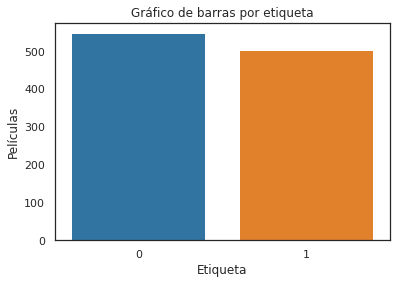

In [8]:
sns.countplot(x='like', data=data)
# Add labels
plt.title('Gráfico de barras por etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Películas')

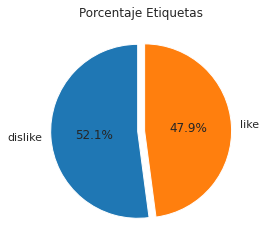

In [9]:
data.like.value_counts().plot(kind='pie', autopct="%.1f%%", 
                              pctdistance=0.5, explode=[0.04]*2, 
                              labels=['dislike', 'like'], 
                              title='Porcentaje Etiquetas', startangle=90, ylabel='')

In [10]:
data.head(5)

,id,like,title,overview,n_words
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde...",87
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p...",69
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...,76
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...,103
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b...",54


In [11]:
pd.DataFrame(data.n_words.describe())

,n_words
count,1052.000000
mean,83.689163
std,34.182019
min,22.000000
25%,58.000000
50%,79.000000
75%,106.000000
max,179.000000


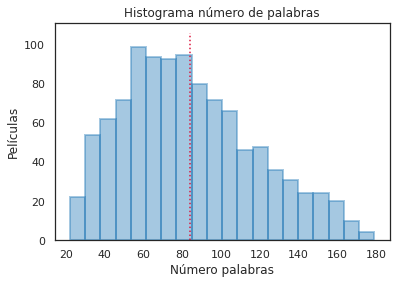

In [12]:
# seaborn histogram
sns.distplot(data['n_words'], hist=True, kde=False, 
             bins=20,
             hist_kws={'edgecolor':'tab:blue', 'linewidth': 2})
# Add labels
plt.title('Histograma número de palabras')
plt.xlabel('Número palabras')
plt.ylabel('Películas')

mean = data.n_words.mean()
plt.vlines(mean, 0, 106, color='crimson', ls=':')

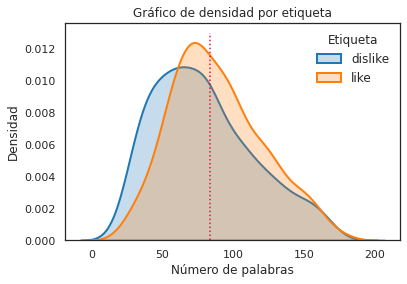

In [13]:
subset_0 = data[data['like'] == 0]
subset_1 = data[data['like'] == 1]
    
# Draw the density plot
sns.distplot(subset_0['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'dislike')

sns.distplot(subset_1['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'like')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por etiqueta')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = data.n_words.mean()
plt.vlines(mean, 0, 0.013, color='crimson', ls=':')

### Wordcloud

Bibligrafia 

https://towardsdatascience.com/generate-modern-stylish-wordcloud-with-stylecloud-9cbb059696d2

https://github.com/minimaxir/stylecloud


In [14]:
%pip install stylecloud

     |████████████████████████████████| 266kB 5.7MB/s 
     |████████████████████████████████| 163kB 7.5MB/s 
     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 92kB 4.8MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.1-cp37-none-any.whl size=259507 sha256=cae222a6f34f915e6230b64073db5098eafb218ec5e67d3241b659e831918dbd
  Stored in directory: /root/.cache/pip/wheels/fb/19/e2/5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=9eeb266c9a84b123cdc25fb599c9cfce5ca30d1088a1212fa79662948161b500
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for tinycss: filename=tinycss-0.4-cp37-none-any.whl size=43942 sha256=9c2b2fe23b0d10333269c8e638380150dd603a42e5a6a73ecfb2ad594d1286d9
  Stored in directory: /root/.cache/pip/wheels/1b/26/08/7390b2e6d5eb3403ef35647f09576459ca567d00ac725307d5

In [15]:
stop_words = pd.read_csv("gdrive/My Drive/TFG/stopwords-es.txt",header=None)
#stop_words = stop_words[0].tolist() 
stop_words = stop_words[0].tolist() + ['padre', 'amigo', 'hombre', 'hijo', 'hija',
                                       'familia', 'amigos', 'madre']

In [16]:
from collections import Counter

text = " ".join(data.overview.values).lower()
myDict = Counter(text.split(" "))
df_words = pd.DataFrame(pd.Series(myDict), columns=['count'])
df_words = df_words.reset_index().rename(columns={'index': 'word'})
df_words = df_words[~df_words['word'].isin(stop_words)].sort_values('count', ascending=False)

new_stop_words = df_words[df_words['count']<=5].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']>5]

new_stop_words = df_words[df_words['count']>=100].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']<100]

In [17]:
import stylecloud

# Mirar como quitar acentos
stylecloud.gen_stylecloud(text = " ".join(data.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_total.png')

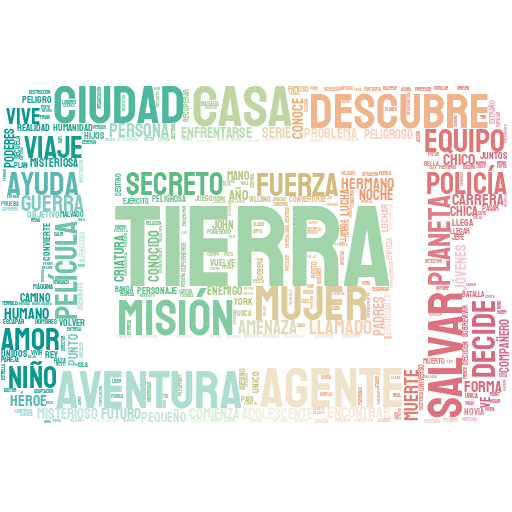

In [18]:
Image('/content/word_cloud_total.png')

In [19]:
stylecloud.gen_stylecloud(text = " ".join(subset_0.overview.values), icon_name= "fas fa-thumbs-down",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_0.png')

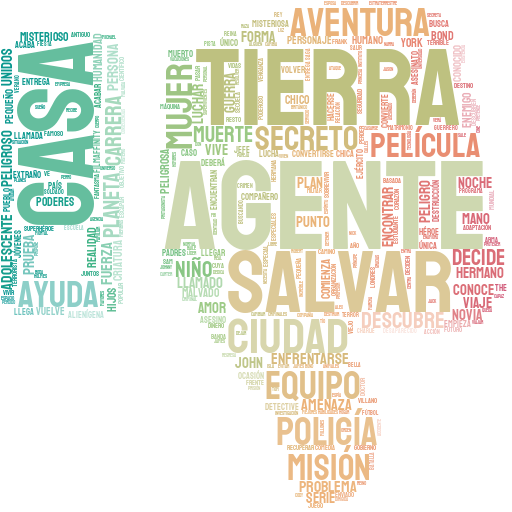

In [20]:
Image('/content/word_cloud_0.png')

In [21]:
stylecloud.gen_stylecloud(text = " ".join(subset_1.overview.values), icon_name="fas fa-thumbs-up",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_1.png')

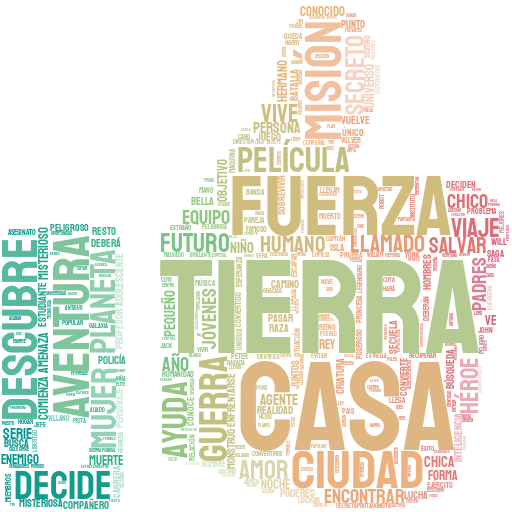

In [22]:
Image('/content/word_cloud_1.png')

## Splitting

We are going to split our dataset in three parts (Train, Test and Validation).
Each part must mantain the same distribution as the original dataset. Same number of 0's and 1's in "like" column. This is achieved by the stratify parameter. 
- Train: 60% of the dataset.
- Test 20% of the dataset.
- Val: 20% of the dataset.

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['like'])
y = data['like']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1996)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=1996) 

In [25]:
my_dict = {
    'Train': len(X_train),
    'Test': len(X_test),
    'Val': len(X_test)
    }
s_shape = pd.Series(data=my_dict)
s_shape.sum()

1052

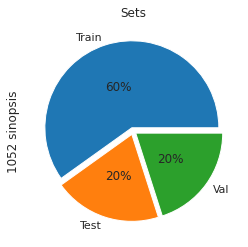

In [30]:
s_shape.plot(kind='pie', autopct="%.f%%", pctdistance=0.5, explode=[0.04]*3,
             title='Sets', figsize=(4,4),
             ylabel='1052 sinopsis', startangle=0)

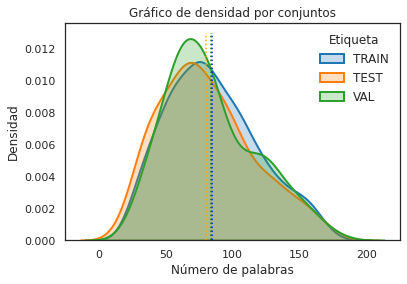

In [31]:
# Draw the density plot general
sns.distplot(X_train['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'TRAIN')

sns.distplot(X_test['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'TEST')    

sns.distplot(X_val['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'VAL')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por conjuntos')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = X_train.n_words.mean()
plt.vlines(mean, 0, 0.013, color='blue', ls=':')
mean = X_test.n_words.mean()
plt.vlines(mean, 0, 0.013, color='orange', ls=':')
mean = X_val.n_words.mean()
plt.vlines(mean, 0, 0.013, color='green', ls=':')

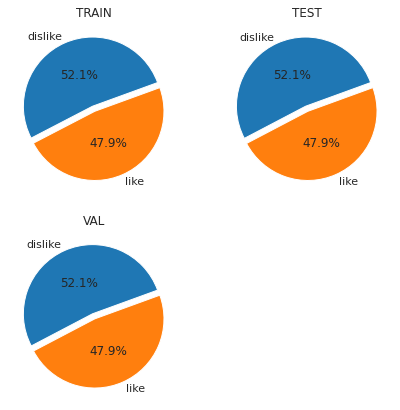

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[1,1].set_visible(False)

y_train.value_counts().plot(kind='pie', autopct="%.1f%%", 
                            pctdistance=0.5, explode=[0.04]*2, 
                            labels=['dislike', 'like'], 
                            title='TRAIN', figsize=(7,7),
                            ylabel='', ax=axs[0,0], startangle=20)

y_test.value_counts().plot(kind='pie', autopct="%.1f%%", 
                            pctdistance=0.5, explode=[0.04]*2, 
                            labels=['dislike', 'like'], 
                            title='TEST', 
                            ylabel='', ax=axs[0,1], startangle=20)

y_val.value_counts().plot(kind='pie', autopct="%.1f%%", 
                            pctdistance=0.5, explode=[0.04]*2, 
                            labels=['dislike', 'like'], 
                            title='VAL', 
                            ylabel='', ax=axs[1,0], startangle=20)

Podemos ver que las distribuciones son exactamente iguales en los tres conjuntos tanto para la longitud de las sinopsis(gráfico de densidad) como para las proporciones de etiquetas (gráficos de tartas).

You can see that the ratio is the same in the three cases and between test and val you have all the same values and cosecuently they have the same distribution.

If the distribution were not the same, it would be imposible to compare between train and validation and this will affect in the model performance because we will obtain dispair metrics for each sample.

(Andrew NG Book)